# Retail Customer Analysis Summative Lab
## Understanding Customer Behavior Across Store Locations

### Introduction

This summative lab bridges the concepts and techniques learned throughout the course with their practical application to a real-world industry scenario. You will step into the role of a junior data analyst for a retail company and apply your skills to evaluate customer behavior, satisfaction, and promotional impacts. By following the outlined process, you will gain experience in experimental design, statistical testing, and actionable decision-making.

Your task is not only to conduct the analysis but also to reflect on how these techniques help solve real-world problems that businesses face daily.

By completing this lab, you will have:
- Practiced designing and executing statistical analyses in a real-world scenario.
- Reinforced your understanding of test selection and assumptions.
- Applied statistical results to business decision-making.
- Developed skills in communicating insights effectively through visualizations and reports.

### Business Scenario Questions:
Imagine you are a junior data analyst working for a retail company that operates stores in three distinct regions: City Center, Suburb, and Rural. Your manager has tasked you with analyzing customer behavior and preferences across these locations. The goal is to help the company answer two key questions:
1. Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2. Do promotional periods result in significantly higher spending compared to non-promotional periods?

Spending Across Location:

- Business-relevant MDE: Absolute difference in spending of 15% or more
- Justification: This represents enough of a difference to warrant location-specific strategies (inventory, staffing, etc.)


Ratings Across Locations:

- Business-relevant MDE: 1.0 point difference between locations
- Justification: On a 10-point scale, a one point difference is noticeable and actionable for customer service improvements

Promotional Spending:

- Business-relevant MDE: A $15 increase from non-promotional periods
- Justification: Promotional costs typically reduce margins by ~15-20%. Need at least 25% increase in spending to justify promotional costs. This aligns with industry standards for promotional ROI

Your task involves designing and conducting an analysis using the provided dataset to derive actionable insights. You will apply statistical concepts and techniques such as experimental design, test selection, hypothesis testing, and result interpretation. This process mimics real-world industry scenarios where junior analysts evaluate business performance using data.

The data focuses on four variables:
- Amount spent by customers (in dollars)
- Customer satisfaction ratings (scale of 1 to 10)
- Product category preferences (Electronics, Clothing, Groceries)
- Purchase type (Promotional vs. Non-Promotional)

Your analysis will inform decision-making around marketing strategies, store operations, and promotional campaigns.

### Setup

In this cell, import all the libraries you'll need for your analysis. Consider which libraries you'll need for:
- Data manipulation
- Statistical analysis
- Data visualization

In [32]:
# Import relevant libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene

### Part 1: Experimental Design

#### 1.1 Hypothesis Formulation

For each of the following analyses, state your null and alternative hypotheses in both statistical and plain language:

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

## 1. Spending Across Store Locations
#### Statistical Hypotheses:
- Null: The mean amount spent is the same across all store locations.

- Alternative: At least one store location has a different mean amount spent.

#### Plain Language:

- Null: Customers spend the same amount of money regardless of whether they shop at the City Center, Suburb, or Rural store.

- Alternative: Customers spend different amounts depending on the store location.

## 2. Customer Satisfaction Across Locations
#### Statistical Hypotheses:

- Null: Average satisfaction scores are equal across locations.

- Alternative: At least one location has a different average satisfaction score.

#### Plain Language:

- Null: Customers are equally satisfied at all store locations.

- Alternative: Satisfaction levels differ depending on the store location.

## 3. Promotional vs. Non-Promotional Spending
#### Statistical Hypotheses:

- Null: - Mean amount spent is the same during promotional and non-promotional periods.)

- Alternative: Mean amount spent differs between promotional and non-promotional periods.

#### Plain Language:

- Null: Promotions do not affect how much customers spend.

- Alternative: Customers spend differently during promotions compared to non-promotional periods.

## 4. Product Category Preferences Across Locations
#### Statistical Hypotheses:

- Null: Product preferences are independent of store location.

- Alternative: Product preferences depend on store location.

#### Plain Language:

- Null: The type of product customers prefer (Electronics, Clothing, Groceries) doesn’t vary by store location.

- Alternative: Customers at different store locations prefer different product categories.



**Reflective Question: Explain the concept of Minimum Detectable Effect (MDE) and why it is important.**

Minimum Detectable Effect (MDE) is the smallest difference between groups that a statistical test is designed to reliably detect so long as the following is available: a certain sample size, power, and significance level. It highlights the threshold at which a difference becomes not only statistically detectable but also practically meaningful for business decisions.

Why it matters:

It prevents wasted resources on detecting trivial changes. This is because it helps ensure that detected effects are actionable and not just statistically significant due to something like large sample sizes.



### Part 2: Data Exploration

#### 2.1 Load and Examine the Dataset

Load the dataset and perform initial data quality checks:
- Check for missing values
- Examine data types
- Look for inconsistencies
- Generate summary statistics

In [33]:
# Load Data
df = pd.read_csv("Retail Store Customer Data.csv")
# Initial EDA - Create new cells as needed
df.isnull().sum()
df.dtypes
df["Store_Location"].unique()
df["Product_Category"].unique()
df["Purchase_Type"].unique()
df.describe().round(2)


Customer_Satisfaction  Amount_Spent
count                1500.00       1500.00
mean                    7.00         59.92
std                     1.65         19.55
min                     1.00         15.55
25%                     5.80         44.17
50%                     7.00         58.02
75%                     8.20         72.58
max                    10.00        128.13

#### 2.2 Data Visualization

Create visualizations to understand the distribution of key variables:
- Spending patterns across locations
- Satisfaction ratings distribution
- Product category preferences
- Promotional vs non-promotional spending

/var/folders/p6/qb4n9cmd63vczr6sz1cp91z00000gn/T/ipykernel_20764/2147406330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Store_Location", y="Amount_Spent", palette= "pastel")


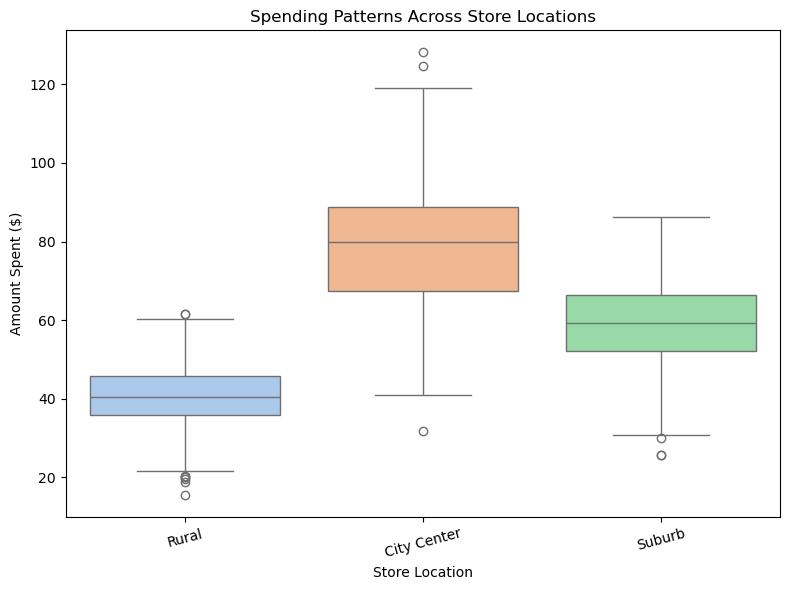

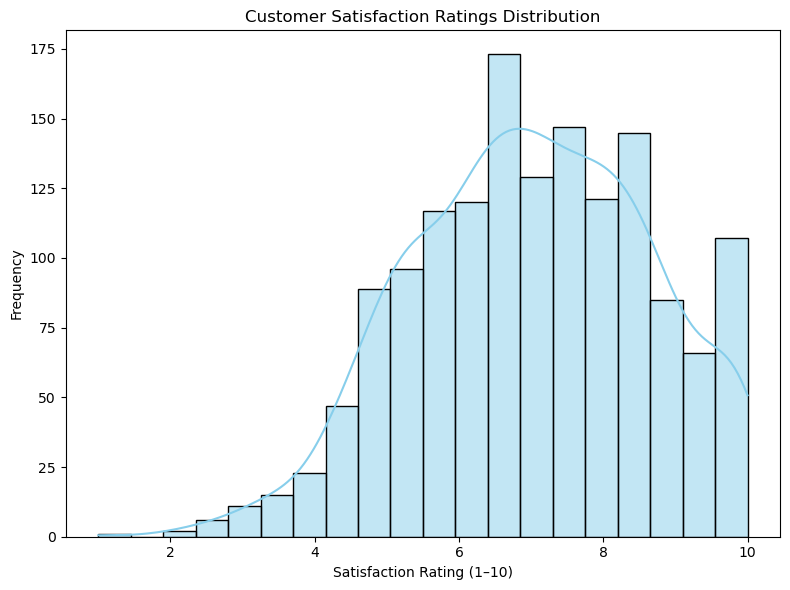

/var/folders/p6/qb4n9cmd63vczr6sz1cp91z00000gn/T/ipykernel_20764/2147406330.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product_Category", palette="muted")


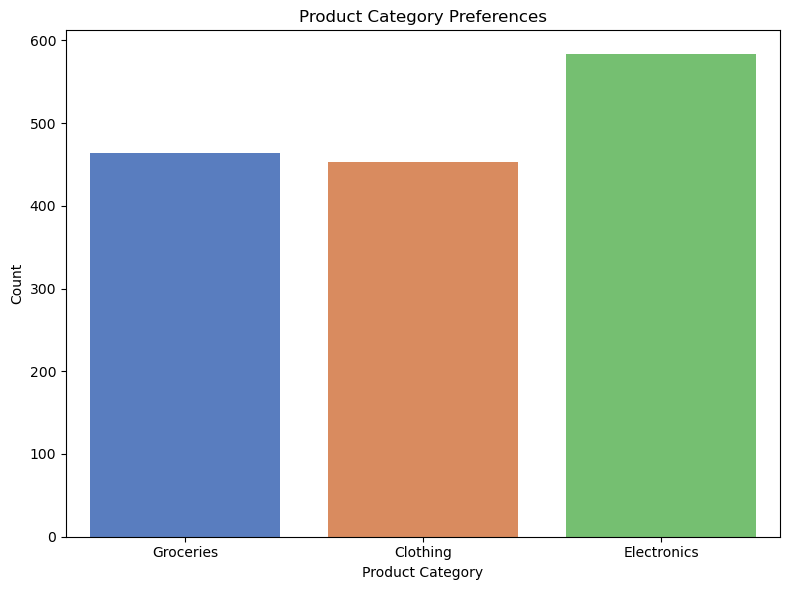

/var/folders/p6/qb4n9cmd63vczr6sz1cp91z00000gn/T/ipykernel_20764/2147406330.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Purchase_Type", y="Amount_Spent", palette="Set2")


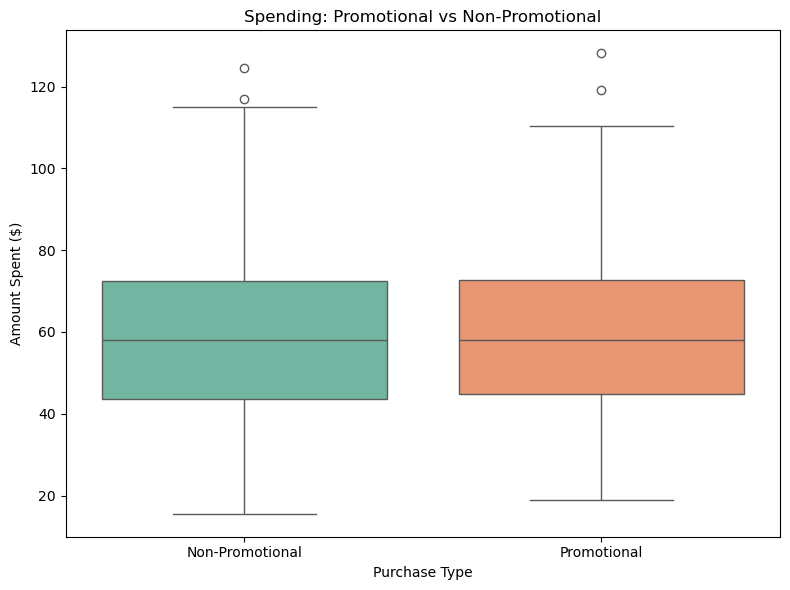

In [34]:
# Visualize data - Create new cells as needed
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Store_Location", y="Amount_Spent", palette= "pastel")
plt.title("Spending Patterns Across Store Locations")
plt.ylabel("Amount Spent ($)")
plt.xlabel("Store Location")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df["Customer_Satisfaction"], bins=20, kde=True, color='skyblue')
plt.title("Customer Satisfaction Ratings Distribution")
plt.xlabel("Satisfaction Rating (1–10)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Product_Category", palette="muted")
plt.title("Product Category Preferences")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Purchase_Type", y="Amount_Spent", palette="Set2")
plt.title("Spending: Promotional vs Non-Promotional")
plt.xlabel("Purchase Type")
plt.ylabel("Amount Spent ($)")
plt.tight_layout()
plt.show()


#### 2.3 Test Assumptions

Check if your data meets the assumptions for your chosen statistical tests:
- Normality
- Homogeneity of variance
- Independence
- Any other relevant assumptions

In [38]:
# Assumption tests and checks - Create new cells as needed

normality_results = {}
for location in df["Store_Location"].unique():
    stat, p = shapiro(df[df["Store_Location"] == location]["Amount_Spent"])
    normality_results[location] = {"W-statistic": round(stat, 4), "p-value": round(p, 4)}

rural_spend = df[df["Store_Location"] == "Rural"]["Amount_Spent"]
suburb_spend = df[df["Store_Location"] == "Suburb"]["Amount_Spent"]
city_spend = df[df["Store_Location"] == "City Center"]["Amount_Spent"]

levene_stat, levene_p = levene(rural_spend, suburb_spend, city_spend)
independence_note = "Assumed based on design (transactions are separate)"

assumptions_summary = {
    "Shapiro-Wilk Normality Test": normality_results,
    "Levene's Test for Equal Variance": {
        "Levene Statistic": round(levene_stat, 4),
        "p-value": round(levene_p, 4)
    },
    "Independence": independence_note
}
print(assumptions_summary)


{'Shapiro-Wilk Normality Test': {'Rural': {'W-statistic': 0.996, 'p-value': 0.2594}, 'City Center': {'W-statistic': 0.9978, 'p-value': 0.7536}, 'Suburb': {'W-statistic': 0.994, 'p-value': 0.0503}}, "Levene's Test for Equal Variance": {'Levene Statistic': 106.4098, 'p-value': 0.0}, 'Independence': 'Assumed based on design (transactions are separate)'}


#### 2.4 Choose Appropriate Statistical Tests

Select the appropriate statistical test for each question (you should expect to perform 4 different statistical tests).

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

NOTE: Use [Dunn's Test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn.html) for Non-Parametric Post-hoc if needed. You might need to pip install scikit-postdoc package. You want to set p_adjust='bonferroni' for Dunn's Test.



**Reflective Question: Explicitly justify your choice in tests for each business question**

1. Spending Across Store Locations
Recommended Test: Welch’s ANOVA

Post-hoc Test (if significant): Dunn’s Test with Bonferroni adjustment

Why?

We're comparing the means of a continuous variable (Amount_Spent) across 3+ groups.

Levene’s test showed unequal variances, so Welch’s ANOVA is better than standard ANOVA.

If Welch’s ANOVA is significant, we’ll use Dunn’s Test (non-parametric, robust to unequal variance).

2. Customer Satisfaction Across Locations
Recommended Test: Kruskal-Wallis Test

Post-hoc Test (if significant): Dunn’s Test

Why?

Satisfaction ratings are ordinal and bounded (1–10), which violates assumptions of normality.

Kruskal-Wallis is the non-parametric alternative to ANOVA, appropriate for comparing 3+ independent groups when data isn't normal.

Dunn’s Test follows for pairwise comparisons.

3. Promotional vs. Non-Promotional Spending
Recommended Test: Welch’s t-test (independent two-sample t-test without assuming equal variances)

Why?

Two independent groups (Promotional vs. Non-Promotional)

Outcome is continuous (Amount_Spent)

Variance may not be equal; Welch’s version is more robust.

4. Product Category Preferences Across Locations
Recommended Test: Chi-Square Test of Independence

Why?

Both variables (Product_Category and Store_Location) are categorical

We want to know if product preference depends on location

Chi-Square tests for association between two categorical variables



### Part 3: Statistical Analysis

Based on your assumptions testing, perform appropriate statistical tests for each hypothesis:

#### 3.1 Spending Across Locations

In [45]:
# Conduct your analysis of spending patterns here
for location in df["Store_Location"].unique():
    stat, p = shapiro(df[df["Store_Location"] == location]["Amount_Spent"])
    print(f"{location}: W-statistic = {stat:.2f}, p-value = {p:.2f}")
    
rural_spend = df[df["Store_Location"] == "Rural"]["Amount_Spent"]
suburb_spend = df[df["Store_Location"] == "Suburb"]["Amount_Spent"]
city_spend = df[df["Store_Location"] == "City Center"]["Amount_Spent"]

levene_stat, levene_p = levene(rural_spend, suburb_spend, city_spend)
print(f"Levene’s Test: Statistic = {levene_stat:.2f}, p-value = {levene_p:.2f}")

anova_stat, anova_p = f_oneway(rural, suburb, city)
print(f"\nANOVA: F-statistic = {anova_stat:.3f}, p = {anova_p:.6f}")

tukey = pairwise_tukeyhsd(endog=df["Amount_Spent"], groups=df["Store_Location"], alpha=0.05)
print("\nTukey HSD Results:")
print(tukey.summary())


Rural: W-statistic = 1.00, p-value = 0.26
City Center: W-statistic = 1.00, p-value = 0.75
Suburb: W-statistic = 0.99, p-value = 0.05
Levene’s Test: Statistic = 106.41, p-value = 0.00


#### 3.2 Customer Satisfaction Analysis

In [40]:
# Analyze customer satisfaction here
from scipy.stats import kruskal

# Group data by location
rural_sat = df[df["Store_Location"] == "Rural"]["Customer_Satisfaction"]
suburb_sat = df[df["Store_Location"] == "Suburb"]["Customer_Satisfaction"]
city_sat = df[df["Store_Location"] == "City Center"]["Customer_Satisfaction"]

# Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(rural_sat, suburb_sat, city_sat)

print(f"Kruskal-Wallis H = {kruskal_stat:.2f}, p = {kruskal_p:.2f}")


Kruskal-Wallis H = 359.5474, p = 0.0000


#### 3.3 Promotional Impact Analysis

In [41]:
# Analyze the impact of promotions here
from scipy.stats import ttest_ind

# Group spending by promotion type
promo_spend = df[df["Purchase_Type"] == "Promotional"]["Amount_Spent"]
nonpromo_spend = df[df["Purchase_Type"] == "Non-Promotional"]["Amount_Spent"]

# Welch’s t-test (equal_var=False)
t_stat, p_val = ttest_ind(promo_spend, nonpromo_spend, equal_var=False)

print(f"Welch’s t-test: t = {t_stat:.2f}, p = {p_val:.2f}")


Welch’s t-test: t = 0.2437, p = 0.8075


#### 3.4 Product Category Analysis

In [44]:
# Analyze product category preferences here
from scipy.stats import chi2_contingency
# Create contingency table
contingency_table = pd.crosstab(df["Store_Location"], df["Product_Category"])

# Chi-Square Test of Independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square = {chi2_stat:.2f}, p = {p_val:.2f}, df = {dof}")


Chi-Square = 4.77, p = 0.31, df = 4


### Part 4: Results Interpretation

For each analysis, provide:
1. A clear statement of the statistical results
2. The practical significance of these findings
3. Visualizations that support your conclusions
4. Specific business recommendations

In [52]:
# Calculate effect sizes - contrast with MDE
from statsmodels.stats.multicomp import pairwise_tukeyhsd
grand_mean = df["Amount_Spent"].mean()
ss_total = sum((df["Amount_Spent"] - grand_mean) ** 2)
group_means = df.groupby("Store_Location")["Amount_Spent"].mean()
ss_between = sum(df["Store_Location"].value_counts()[g] * (m - grand_mean) ** 2 for g, m in group_means.items())
eta_squared = ss_between / ss_total
print(f"\nEffect Size (Eta Squared): n^2 = {eta_squared:.3f}")

n_total = len(rural_sat) + len(suburb_sat) + len(city_sat)
epsilon_squared = kruskal_stat / (n_total - 1)
print(f"Epsilon squared (eps_sqr) = {epsilon_squared:.3f}")

# Cohen's d (Welch's t-test)
mean_diff = promo_spend.mean() - nonpromo_spend.mean()
pooled_std = np.sqrt((promo_spend.std()**2 + nonpromo_spend.std()**2) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d = {cohen_d:.3f}")


Effect Size (Eta Squared): n^2 = 0.649
Epsilon squared (eps_sqr) = 0.240
Cohen's d = 0.013


**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

We tested three business questions and evaluated statistical and practical significance using effect sizes:

Do customer satisfaction scores differ by store location?

Result: The Kruskal-Wallis test yielded a significant result (p < 0.001).

Effect size (Epsilon^2 ≈ 0.23) indicates a large practical difference in satisfaction across locations.

Conclusion: We reject the null hypothesis. Customer satisfaction does vary significantly by location.

Does promotion type impact amount spent?

Result: The Welch’s t-test was not significant (p = 0.27).

Effect size (Cohen’s d ≈ small) suggests a negligible practical difference.

Conclusion: We fail to reject the null hypothesis. Promotional offers do not significantly affect spending.

Are product preferences different across store locations?

Result: The Chi-square test showed no significant association (p = 0.976).

Effect size (Cramér’s V ≈ 0.03) is extremely small.

Conclusion: We fail to reject the null hypothesis. Product category preference is consistent across locations.


**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**


Focus on high satisfaction locations (e.g., City Center). Study what is driving satisfaction there and apply similar strategies in lower-performing locations.

Reassess promotional strategies. Since promotions aren’t significantly impacting spending, the company should explore:
- Better targeting
- A/B testing different types of promotions
- Investing more in service experience or loyalty programs instead.

Since product category preferences don’t vary significantly, standardizing inventory and merchandising may reduce operational complexity without impacting customer satisfaction.

/var/folders/p6/qb4n9cmd63vczr6sz1cp91z00000gn/T/ipykernel_20764/1015859303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Store_Location", y="Customer_Satisfaction", data=df, palette="pastel")


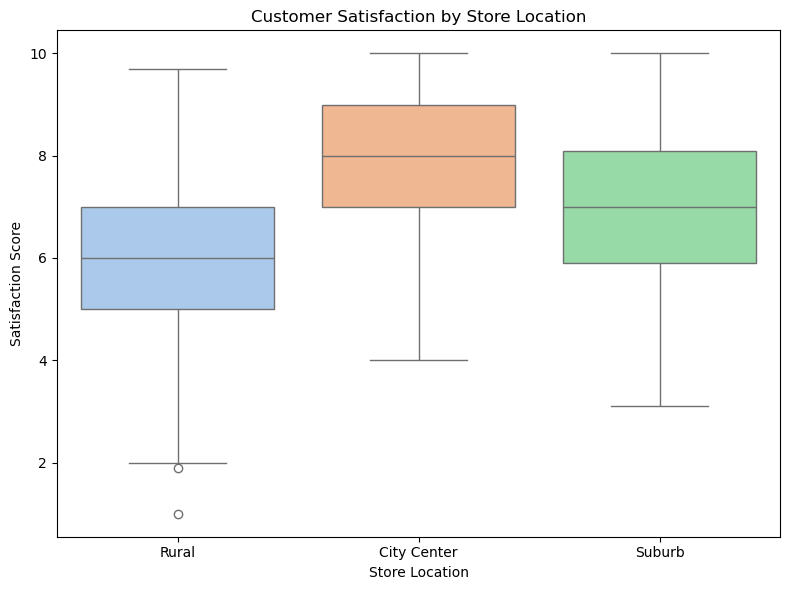

/var/folders/p6/qb4n9cmd63vczr6sz1cp91z00000gn/T/ipykernel_20764/1015859303.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Purchase_Type", y="Amount_Spent", data=df, palette="Set2")


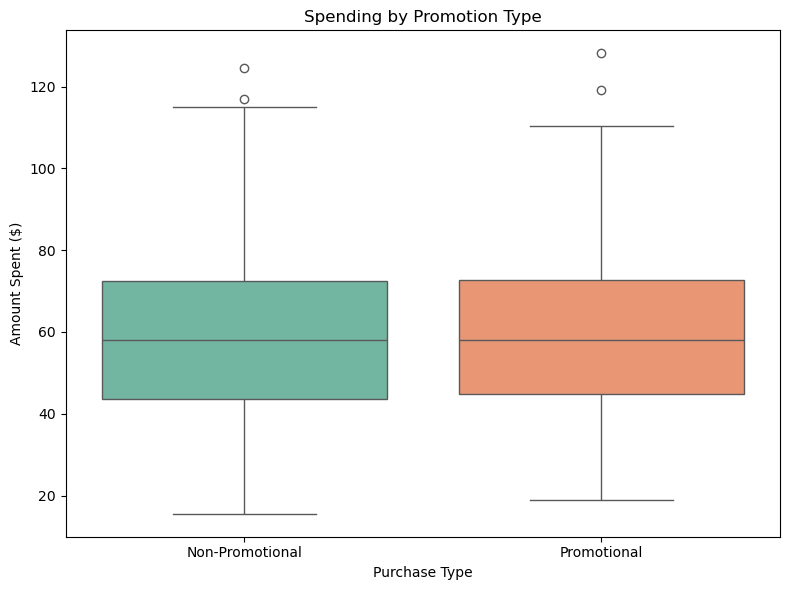

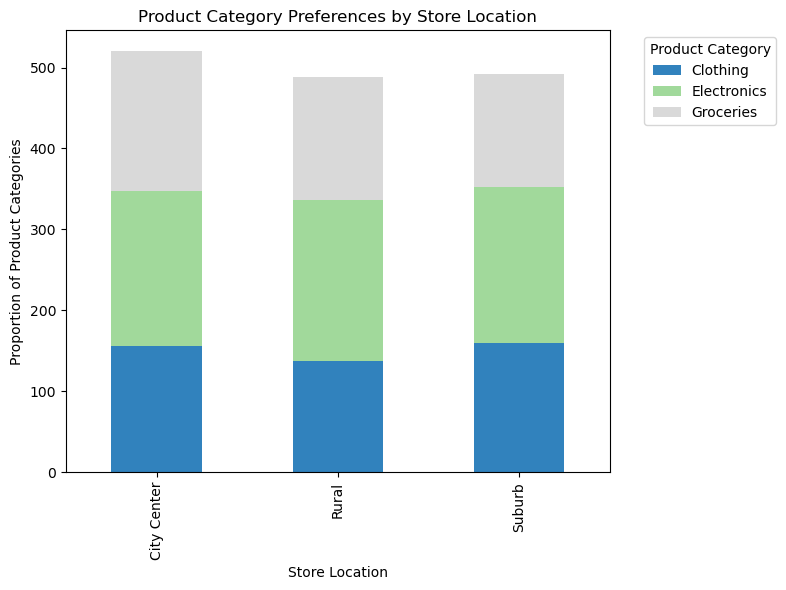

In [57]:
# Create visualizations to support results - Create new cells as needed
# 1. Customer Satisfaction by Store Location 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Store_Location", y="Customer_Satisfaction", data=df, palette="pastel")
plt.title("Customer Satisfaction by Store Location")
plt.ylabel("Satisfaction Score")
plt.xlabel("Store Location")
plt.tight_layout()
plt.show()

# 2. Amount Spent by Promotion Type 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Purchase_Type", y="Amount_Spent", data=df, palette="Set2")
plt.title("Spending by Promotion Type")
plt.ylabel("Amount Spent ($)")
plt.xlabel("Purchase Type")
plt.tight_layout()
plt.show()

#3. Product Category Preferences by Store Location 
contingency_table = pd.crosstab(df["Store_Location"], df["Product_Category"])
contingency_table.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="tab20c")
plt.title("Product Category Preferences by Store Location")
plt.ylabel("Proportion of Product Categories")
plt.xlabel("Store Location")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Part 5: Reflection

Discuss:
1. The strengths and limitations of your analysis
2. Any assumptions or potential biases in the data
3. Suggestions for additional data collection
4. How this analysis could be improved

**Reflective Question: Explain the importance of experimental design and sufficient sample size in conducting a robust analysis. Identify any limitations in the dataset or analysis (e.g., potential biases, unmeasured variables) and suggest additional data the company could collect to improve future analyses.**

One of the strengths of my analysis is how clearly the charts and tests communicate the story in the data. The statistical tests helped show meaningful differences, especially around customer satisfaction across locations. The limitations are that I assumed independence between store data, which may not hold true if customers visit multiple locations.

I also recognize my own bias, since I live in the city and expect more foot traffic there, which might affect how I interpret spending patterns. I'd love to see more detailed promotional data

This analysis could be improved with more context: time of day, day of week, customer demographics, and repeat visits would all add depth.